In [62]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import os
import seaborn as sns
import sklearn.metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.tree import DecisionTreeClassifier,export_graphviz # Import Decision Tree Classifier
from sklearn import tree
#from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier # Import KNN Classifier


In [2]:
#Import dataset
df = pd.read_csv('data.csv')
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#EDA
# view dimensions of dataset
df.shape

(569, 33)

In [4]:
# First 5 rows
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
#Descriptive Stats
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 1 categorical variables

The categorical variables are :

 ['diagnosis']


In [8]:
#Data Cleaning
# check missing values in categorical variables
df[categorical].isnull().sum()

diagnosis    0
dtype: int64

In [9]:
# view frequency counts of values in categorical variables

for var in categorical: 
    
    print(df[var].value_counts())

B    357
M    212
Name: diagnosis, dtype: int64


In [10]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 32 numerical variables

The numerical variables are : ['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


In [11]:
# check missing values in numerical variables
df[numerical].isnull().sum()

id                           0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [12]:
# Clearly seen that "Unnamed:32" has all the values NaN. So we just directly drop this column,

In [13]:
df.drop("Unnamed: 32", inplace=True, axis=1)

In [14]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
#Target variable value count
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [16]:
X = df.drop(['diagnosis'], axis=1) # Data set of all independet variables

y = df['diagnosis'] # Dataset of target variable

# Decision Tree

In [20]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)


In [21]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((398, 31), (171, 31))

In [22]:
# check data types in X_train

X_train.dtypes

id                           int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [ ]:
#All thee columns are above there are numerical

In [23]:
# check missing values in X_train

X_train.isnull().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [24]:
# check missing values in X_test

X_test.isnull().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [25]:
# Feature Scaling

In [26]:
cols = X_test.columns

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [28]:
X_train

array([[9.90895727e-04, 2.13403379e-01, 2.02489627e-01, ...,
        2.55976576e-01, 2.71239897e-01, 2.41112423e-01],
       [9.70015936e-04, 1.66075063e-01, 3.69294606e-01, ...,
        2.24870823e-01, 1.27735068e-01, 1.53351699e-01],
       [9.54923737e-03, 2.49372900e-01, 3.41493776e-01, ...,
        2.82845332e-01, 3.05144885e-01, 1.72373081e-01],
       ...,
       [9.88712754e-01, 1.16191017e-01, 3.57261411e-01, ...,
        1.74026869e-01, 1.75241474e-01, 1.72635445e-01],
       [9.50749205e-04, 1.29632259e-01, 3.53112033e-01, ...,
        0.00000000e+00, 6.78099744e-02, 6.91984783e-02],
       [1.00582585e-03, 2.14349946e-01, 5.90041494e-01, ...,
        3.32518085e-01, 1.07825744e-01, 2.11727666e-01]])

In [29]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [30]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [31]:
X_train.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.000991,0.213403,0.202490,0.208693,0.110880,0.564462,0.215396,0.124367,0.097863,0.363131,...,0.159018,0.263326,0.157528,0.069406,0.422836,0.168534,0.234932,0.255977,0.271240,0.241112
1,0.000970,0.166075,0.369295,0.159422,0.080933,0.588357,0.162318,0.053819,0.088469,0.213131,...,0.111348,0.333689,0.101350,0.046746,0.463118,0.074813,0.076226,0.224871,0.127735,0.153352
2,0.009549,0.249373,0.341494,0.238270,0.134380,0.368307,0.162352,0.091026,0.115855,0.459596,...,0.201352,0.351812,0.180238,0.093148,0.333686,0.146996,0.175837,0.282845,0.305145,0.172373
3,0.000950,0.536182,0.368050,0.516965,0.380700,0.361138,0.223615,0.191401,0.288966,0.283333,...,0.475987,0.382196,0.442203,0.301022,0.344912,0.210738,0.320181,0.541164,0.323477,0.094057
4,0.000937,0.000000,0.154357,0.000000,0.000000,0.699142,0.192795,0.000000,0.000000,0.439394,...,0.000000,0.200426,0.000000,0.000000,0.576042,0.090142,0.000000,0.000000,0.269466,0.254362


# Decision Tree


In [42]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz # Import Decision Tree Classifier
from sklearn import tree
from sklearn import metrics

In [43]:
clf = DecisionTreeClassifier(criterion="gini")
tree1=clf.fit(X_train,y_train)

In [44]:
#Model Evaluation
#Predict response on test dataset
Y_pred = tree1.predict(X_test)

In [45]:
#Model Accuracy
Accuracy = sklearn.metrics.accuracy_score(y_test, Y_pred)*100
print(Accuracy)

91.22807017543859


In [47]:
#Confusion Matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, Y_pred)
cnf_matrix

array([[98, 10],
       [ 5, 58]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

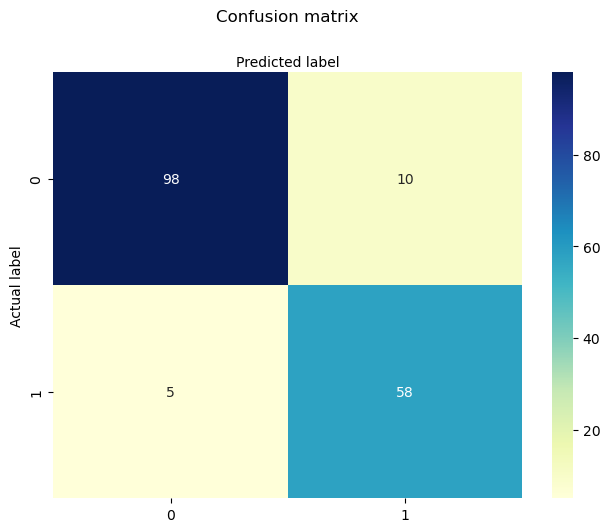

In [48]:
#Visualization of Confusion Matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [51]:
#Performance
confusion = sklearn.metrics.confusion_matrix(y_test, Y_pred)
sensitivity = (confusion[1][1]/float(confusion[1:].sum()))*100
specificity = (confusion[0][0]/float(confusion[:,0].sum()))*100
print ("The sensitivity is {0:.3f}".format(sensitivity))
print ("The specificity is {0:.3f}".format(specificity))

#AUC
from sklearn.metrics import roc_curve, roc_auc_score
# Calculate roc auc
clf_probs = clf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, clf_probs)*100

The sensitivity is 92.063
The specificity is 95.146


91.40211640211639

# KNN

Text(0, 0.5, 'Accuracy Score')

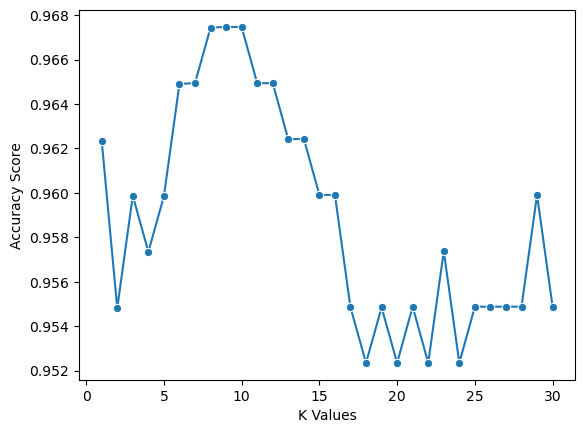

In [64]:
#Chose Optimal Value of K
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
k_values = [i for i in range (1,31)]
scores = []

scaler = MinMaxScaler()
X = scaler.fit_transform(X_train)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X,y_train, cv=5)
    scores.append(np.mean(score))
    
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [65]:
#Model Building 
# Create KNN classifer object
knn = KNeighborsClassifier()

In [66]:
#Get Model parameters
knn.get_params(deep=True)

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [67]:
# Train KNN Classifer
result=knn.fit(X_train,y_train)
result

KNeighborsClassifier()

In [72]:
 #Model Evaluation
#Predict response on test dataset
Y_pred = knn.predict(X_test.values)

In [74]:
#Confusion Matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, Y_pred)
cnf_matrix

array([[106,   2],
       [  6,  57]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

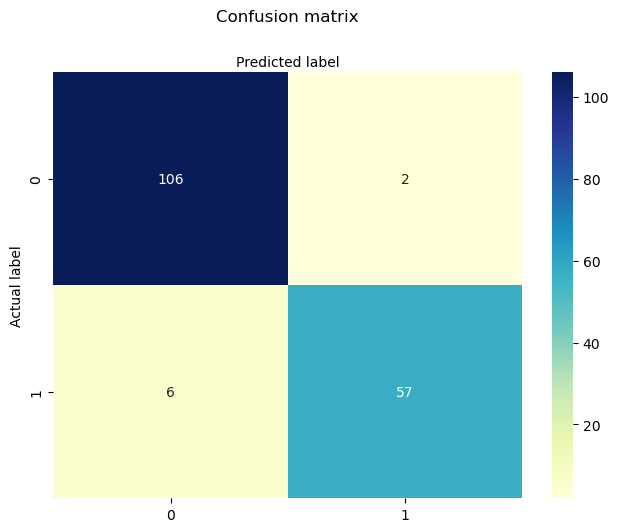

In [75]:
#Visualization of Confusion Matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [77]:
#Performance
confusion = sklearn.metrics.confusion_matrix(y_test, Y_pred)
sensitivity = (confusion[1][1]/float(confusion[1:].sum()))*100
specificity = (confusion[0][0]/float(confusion[:,0].sum()))*100
print ("The sensitivity is {0:.3f}".format(sensitivity))
print ("The specificity is {0:.3f}".format(specificity))

#AUC
from sklearn.metrics import roc_curve, roc_auc_score
# Calculate roc auc
knn_probs = knn.predict_proba(X_test.values)[:, 1]
roc_auc_score(y_test, knn_probs)*100

The sensitivity is 90.476
The specificity is 94.643


98.5082304526749

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred, target_names=["False","True"]))

              precision    recall  f1-score   support

       False       0.95      0.98      0.96       108
        True       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

